<a href="https://www.kaggle.com/code/harshyadav02/lgbm-for-both-defog-tdcsfog?scriptVersionId=153363621" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# import library
import os
import random
import cv2
import pandas as pd
import numpy as np

## Pre-processing (DEFOG)🏡

In [2]:
events = pd.read_csv('/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/events.csv')

In [3]:
events.head()

,Id,Init,Completion,Type,Kinetic
0,003f117e14,8.61312,14.7731,Turn,1.0
1,009ee11563,11.38470,41.1847,Turn,1.0
2,009ee11563,54.66470,58.7847,Turn,1.0
3,011322847a,28.09660,30.2966,Turn,1.0
4,01d0fe7266,30.31840,31.8784,Turn,1.0


In [4]:
events.count()

Id            3544
Init          3544
Completion    3544
Type          2502
Kinetic       2502
dtype: int64

In [5]:
events['Id'].unique().shape

(535,)

In [6]:
#reference: https://www.kaggle.com/code/ghrangel/read-data-and-merge

DATA_ROOT_DEFOG = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/defog/'
defog = pd.DataFrame()
for root, dirs, files in os.walk(DATA_ROOT_DEFOG):
    for name in files:       
        f = os.path.join(root, name)
        df_list= pd.read_csv(f)
        df_list['file']= name.split('.')[0]
        defog = pd.concat([defog, df_list], axis=0)

defog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,Valid,Task,file
0,0,-1.002697,0.022371,0.068304,0,0,0,False,False,be9d33541d
1,1,-1.002641,0.019173,0.066162,0,0,0,False,False,be9d33541d
2,2,-0.999820,0.019142,0.067536,0,0,0,False,False,be9d33541d
3,3,-0.998023,0.018378,0.068409,0,0,0,False,False,be9d33541d
4,4,-0.998359,0.016726,0.066448,0,0,0,False,False,be9d33541d
...,...,...,...,...,...,...,...,...,...,...
109120,109120,-0.939241,0.031564,-0.394737,0,0,0,False,False,06414383cf
109121,109121,-0.941096,0.031582,-0.392626,0,0,0,False,False,06414383cf
109122,109122,-0.940131,0.029092,-0.394385,0,0,0,False,False,06414383cf
109123,109123,-0.939872,0.028058,-0.398664,0,0,0,False,False,06414383cf


In [7]:
defog['file'].unique().shape

(91,)

In [8]:
defog = defog[(defog['Task']==1)&(defog['Valid']==1)]

In [9]:
print('the shape of defog dataset is {}'.format(defog.shape))

the shape of defog dataset is (4090530, 10)


##  Combining it with 🏡defog-metadata.

In [10]:
defog_metadata = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/defog_metadata.csv")
defog_metadata

,Id,Subject,Visit,Medication
0,02ab235146,e1f62e,2,on
1,02ea782681,ae2d35,2,on
2,06414383cf,8c1f5e,2,off
3,092b4c1819,2874c5,1,off
4,0a900ed8a2,0e3d49,2,on
...,...,...,...,...
132,f3a921edee,1a778d,1,off
133,f40e8c6ebe,575c60,1,off
134,f8ddbdd98d,107712,1,on
135,f9efef91fb,5d9cae,2,off


In [11]:
defog_metadata['Subject'].unique().shape

(45,)

In [12]:
defog_m= defog_metadata.merge(defog, how = 'inner', left_on = 'Id', right_on = 'file')
defog_m.drop(['file','Valid','Task'], axis = 1, inplace = True)
defog_m

,Id,Subject,Visit,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,02ea782681,ae2d35,2,on,1000,-0.970018,0.061626,-0.265625,0,0,0
1,02ea782681,ae2d35,2,on,1001,-0.984375,0.044497,-0.265625,0,0,0
2,02ea782681,ae2d35,2,on,1002,-0.984375,0.029016,-0.265625,0,0,0
3,02ea782681,ae2d35,2,on,1003,-0.984375,0.015625,-0.265625,0,0,0
4,02ea782681,ae2d35,2,on,1004,-0.984670,0.015330,-0.265625,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4090525,f9fc61ce85,040587,1,on,119027,-0.961216,0.142428,-0.289655,0,0,0
4090526,f9fc61ce85,040587,1,on,119028,-0.960343,0.142836,-0.290506,0,0,0
4090527,f9fc61ce85,040587,1,on,119029,-0.957958,0.145494,-0.290007,0,0,0
4090528,f9fc61ce85,040587,1,on,119030,-0.960616,0.145839,-0.291527,0,0,0


In [13]:
# summary table function
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values * 100
    summ['%missing'] = df.isnull().sum().values / len(df)
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values
    
    return summ

In [14]:
summary(defog_m)

data shape: (4090530, 11)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Id,object,0,0.0,91,NaN,NaN,02ea782681,02ea782681,02ea782681
Subject,object,0,0.0,38,NaN,NaN,ae2d35,ae2d35,ae2d35
Visit,int64,0,0.0,2,1.0,2.0,2,2,2
Medication,object,0,0.0,2,NaN,NaN,on,on,on
Time,int64,0,0.0,338197,1000.0,414387.0,1000,1001,1002
AccV,float64,0,0.0,3485229,-6.024701,4.458365,-0.970018,-0.984375,-0.984375
AccML,float64,0,0.0,3539384,-2.115008,4.524038,0.061626,0.044497,0.029016
AccAP,float64,0,0.0,3437121,-5.11865,4.388132,-0.265625,-0.265625,-0.265625
StartHesitation,int64,0,0.0,2,0.0,1.0,0,0,0
Turn,int64,0,0.0,2,0.0,1.0,0,0,0


In [15]:
defog_m['StartHesitation'].value_counts()

0    4090030
1        500
Name: StartHesitation, dtype: int64

In [16]:
defog_m['Turn'].value_counts()

0    3503701
1     586829
Name: Turn, dtype: int64

In [17]:
defog_m['Walking'].value_counts()

0    3992012
1      98518
Name: Walking, dtype: int64

In [18]:
# garbage collection for memory
import gc
gc.collect()

92

## Pre-Processing (TDCSFOG)🥼

In [19]:
DATA_ROOT_TDCSFOG = '/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/train/tdcsfog/'
tdcsfog = pd.DataFrame()
for root, dirs, files in os.walk(DATA_ROOT_TDCSFOG):
    for name in files:       
        f = os.path.join(root, name)
        df_list= pd.read_csv(f)
        words = name.split('.')[0]
        df_list['file']= name.split('.')[0]
        tdcsfog = pd.concat([tdcsfog, df_list], axis=0)
tdcsfog

,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,file
0,0,-9.665890,0.042550,0.184744,0,0,0,a171e61840
1,1,-9.672969,0.049217,0.184644,0,0,0,a171e61840
2,2,-9.670260,0.033620,0.193790,0,0,0,a171e61840
3,3,-9.673356,0.035159,0.184369,0,0,0,a171e61840
4,4,-9.671458,0.043913,0.197814,0,0,0,a171e61840
...,...,...,...,...,...,...,...,...
5153,5153,-9.915920,-0.105897,-1.123455,0,0,0,0506d9a39f
5154,5154,-9.693752,-0.066892,-1.114903,0,0,0,0506d9a39f
5155,5155,-9.548118,-0.098315,-1.112123,0,0,0,0506d9a39f
5156,5156,-9.469803,-0.111004,-1.130814,0,0,0,0506d9a39f


##  Combining it with 🥼tdcsfog-metadata.

In [20]:
tdcsfog_metadata = pd.read_csv("/kaggle/input/tlvmc-parkinsons-freezing-gait-prediction/tdcsfog_metadata.csv")
tdcsfog_metadata

,Id,Subject,Visit,Test,Medication
0,003f117e14,4dc2f8,3,2,on
1,009ee11563,f62eec,4,2,on
2,011322847a,231c3b,2,2,on
3,01d0fe7266,231c3b,2,1,off
4,024418ba39,fa8764,19,3,on
...,...,...,...,...,...
828,feba449e1a,312788,19,1,on
829,ff4f844fd3,af82b2,2,3,on
830,ff53514514,3b2403,2,3,on
831,ff92d9244d,2d57c2,20,2,on


In [21]:
tdcsfog_m= tdcsfog_metadata.merge(tdcsfog, how = 'inner', left_on = 'Id', right_on = 'file')
tdcsfog_m.drop(['file'], axis = 1, inplace = True)
tdcsfog_m

,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,003f117e14,4dc2f8,3,2,on,0,-9.533939,0.566322,-1.413525,0,0,0
1,003f117e14,4dc2f8,3,2,on,1,-9.536140,0.564137,-1.440621,0,0,0
2,003f117e14,4dc2f8,3,2,on,2,-9.529345,0.561765,-1.429332,0,0,0
3,003f117e14,4dc2f8,3,2,on,3,-9.531239,0.564227,-1.415490,0,0,0
4,003f117e14,4dc2f8,3,2,on,4,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7062667,ffda8fadfd,7fcee9,20,1,off,4220,-9.403467,0.089003,-3.220304,0,0,0
7062668,ffda8fadfd,7fcee9,20,1,off,4221,-9.404246,0.090531,-3.216584,0,0,0
7062669,ffda8fadfd,7fcee9,20,1,off,4222,-9.405770,0.084380,-3.224039,0,0,0
7062670,ffda8fadfd,7fcee9,20,1,off,4223,-9.403579,0.084236,-3.236686,0,0,0


In [22]:
summary(tdcsfog_m)

data shape: (7062672, 12)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
Id,object,0,0.0,833,NaN,NaN,003f117e14,003f117e14,003f117e14
Subject,object,0,0.0,62,NaN,NaN,4dc2f8,4dc2f8,4dc2f8
Visit,int64,0,0.0,7,2.0,20.0,3,3,3
Test,int64,0,0.0,3,1.0,3.0,2,2,2
Medication,object,0,0.0,2,NaN,NaN,on,on,on
Time,int64,0,0.0,97077,0.0,97076.0,0,1,2
AccV,float64,0,0.0,7027490,-35.521119,20.906953,-9.533939,-9.53614,-9.529345
AccML,float64,0,0.0,7030366,-26.164398,27.484719,0.566322,0.564137,0.561765
AccAP,float64,0,0.0,7028071,-47.829639,30.337694,-1.413525,-1.440621,-1.429332
StartHesitation,int64,0,0.0,2,0.0,1.0,0,0,0


In [23]:
# garbage collection for memory
import gc
gc.collect()

23

# Feature engineering and modeling (DEFOG)🏡

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [25]:
conditions = [
    (defog_m['StartHesitation'] == 1),
    (defog_m['Turn'] == 1),
    (defog_m['Walking'] == 1)]
choices = ['StartHesitation', 'Turn', 'Walking']
defog_m['event'] = np.select(conditions, choices, default='Normal')

In [26]:
defog_m['event'].value_counts().to_frame().style.background_gradient()

,event
Normal,3404683
Turn,586829
Walking,98518
StartHesitation,500


In [27]:
defog_m

,Id,Subject,Visit,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking,event
0,02ea782681,ae2d35,2,on,1000,-0.970018,0.061626,-0.265625,0,0,0,Normal
1,02ea782681,ae2d35,2,on,1001,-0.984375,0.044497,-0.265625,0,0,0,Normal
2,02ea782681,ae2d35,2,on,1002,-0.984375,0.029016,-0.265625,0,0,0,Normal
3,02ea782681,ae2d35,2,on,1003,-0.984375,0.015625,-0.265625,0,0,0,Normal
4,02ea782681,ae2d35,2,on,1004,-0.984670,0.015330,-0.265625,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...
4090525,f9fc61ce85,040587,1,on,119027,-0.961216,0.142428,-0.289655,0,0,0,Normal
4090526,f9fc61ce85,040587,1,on,119028,-0.960343,0.142836,-0.290506,0,0,0,Normal
4090527,f9fc61ce85,040587,1,on,119029,-0.957958,0.145494,-0.290007,0,0,0,Normal
4090528,f9fc61ce85,040587,1,on,119030,-0.960616,0.145839,-0.291527,0,0,0,Normal


In [28]:
train_df = defog_m[['AccV','AccML','AccAP','event']]

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

train_df['target'] = le.fit_transform(train_df['event'])

In [30]:
X = train_df.drop(['event','target'], axis=1)
y = train_df['target']

In [31]:
X

,AccV,AccML,AccAP
0,-0.970018,0.061626,-0.265625
1,-0.984375,0.044497,-0.265625
2,-0.984375,0.029016,-0.265625
3,-0.984375,0.015625,-0.265625
4,-0.984670,0.015330,-0.265625
...,...,...,...
4090525,-0.961216,0.142428,-0.289655
4090526,-0.960343,0.142836,-0.290506
4090527,-0.957958,0.145494,-0.290007
4090528,-0.960616,0.145839,-0.291527


In [34]:
y

0          0
1          0
2          0
3          0
4          0
          ..
4090525    0
4090526    0
4090527    0
4090528    0
4090529    0
Name: target, Length: 4090530, dtype: int64

In [35]:
y.unique()

array([0, 2, 3, 1])

In [36]:
y.value_counts()

0    3404683
2     586829
3      98518
1        500
Name: target, dtype: int64

In [37]:
# spliting dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1004)

In [38]:
# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [39]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7644649144894834
Confusion Matrix:
[[876620    134 118662  25603]
 [   124      5     20      3]
 [113695     24  58809   3743]
 [ 23441      2   3588   2686]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86   1021019
           1       0.03      0.03      0.03       152
           2       0.32      0.33      0.33    176271
           3       0.08      0.09      0.09     29717

    accuracy                           0.76   1227159
   macro avg       0.33      0.33      0.33   1227159
weighted avg       0.77      0.76      0.77   1227159



In [40]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Initialize the Naive Bayes Classifier
clf = GaussianNB()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

In [41]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8320144333374893
Confusion Matrix:
[[1021014       0       5       0]
 [    152       0       0       0]
 [ 176271       0       0       0]
 [  29717       0       0       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91   1021019
           1       0.00      0.00      0.00       152
           2       0.00      0.00      0.00    176271
           3       0.00      0.00      0.00     29717

    accuracy                           0.83   1227159
   macro avg       0.21      0.25      0.23   1227159
weighted avg       0.69      0.83      0.76   1227159



In [42]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [43]:
# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8394780138515058
Confusion Matrix:
[[987819      1  32449    750]
 [   139      0     13      0]
 [134598      0  41523    150]
 [ 28305      0    581    831]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91   1021019
           1       0.00      0.00      0.00       152
           2       0.56      0.24      0.33    176271
           3       0.48      0.03      0.05     29717

    accuracy                           0.84   1227159
   macro avg       0.47      0.31      0.32   1227159
weighted avg       0.81      0.84      0.81   1227159



In [44]:
# XG boost
from xgboost import XGBClassifier

# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)


In [45]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8333907831014563
Confusion Matrix:
[[1019172       0    1847       0]
 [    152       0       0       0]
 [ 172740       0    3531       0]
 [  29713       0       4       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91   1021019
           1       0.00      0.00      0.00       152
           2       0.66      0.02      0.04    176271
           3       0.00      0.00      0.00     29717

    accuracy                           0.83   1227159
   macro avg       0.37      0.25      0.24   1227159
weighted avg       0.79      0.83      0.76   1227159



In [64]:
print(y_pred[0:999])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [65]:
# LGBM
from lightgbm import LGBMClassifier

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)


In [66]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8336955520841227
Confusion Matrix:
[[1017220       0    3799       0]
 [    152       0       0       0]
 [ 170414       0    5857       0]
 [  29701       0      16       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91   1021019
           1       0.00      0.00      0.00       152
           2       0.61      0.03      0.06    176271
           3       0.00      0.00      0.00     29717

    accuracy                           0.83   1227159
   macro avg       0.36      0.26      0.24   1227159
weighted avg       0.78      0.83      0.77   1227159



In [69]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) based on your preference

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [70]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8303520570683994
Confusion Matrix:
[[972169      4  47315   1531]
 [   141      2      9      0]
 [130247      0  45794    230]
 [ 27661      0   1047   1009]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90   1021019
           1       0.33      0.01      0.03       152
           2       0.49      0.26      0.34    176271
           3       0.36      0.03      0.06     29717

    accuracy                           0.83   1227159
   macro avg       0.51      0.31      0.33   1227159
weighted avg       0.79      0.83      0.80   1227159



In [72]:
# Neural Network
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Assuming you have already defined X_train, X_test, y_train, y_test

# Assuming y_train contains the labels and you want to predict multiple classes
num_classes = len(np.unique(y_train))

# Convert labels to one-hot encoding
y_train_one_hot = tf.keras.utils.to_categorical(y_train, num_classes)
y_test_one_hot = tf.keras.utils.to_categorical(y_test, num_classes)

# Initialize the neural network
model = Sequential()

# Add layers to the model
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

# Make predictions on the test set
y_pred_one_hot = model.predict(X_test)
y_pred = np.argmax(y_pred_one_hot, axis=1)


Epoch 1/10
80533/80533 [==============================] - 267s 3ms/step - loss: 0.4635 - accuracy: 0.8334 - val_loss: 0.4545 - val_accuracy: 0.8350
Epoch 2/10
80533/80533 [==============================] - 260s 3ms/step - loss: 0.4528 - accuracy: 0.8354 - val_loss: 0.4507 - val_accuracy: 0.8374
Epoch 3/10
80533/80533 [==============================] - 258s 3ms/step - loss: 0.4503 - accuracy: 0.8364 - val_loss: 0.4504 - val_accuracy: 0.8355
Epoch 4/10
80533/80533 [==============================] - 259s 3ms/step - loss: 0.4489 - accuracy: 0.8367 - val_loss: 0.4484 - val_accuracy: 0.8370
Epoch 5/10
80533/80533 [==============================] - 262s 3ms/step - loss: 0.4481 - accuracy: 0.8369 - val_loss: 0.4479 - val_accuracy: 0.8378
Epoch 6/10
80533/80533 [==============================] - 261s 3ms/step - loss: 0.4475 - accuracy: 0.8370 - val_loss: 0.4519 - val_accuracy: 0.8373
Epoch 7/10
80533/80533 [==============================] - 259s 3ms/step - loss: 0.4469 - accuracy: 0.8373 - val_

In [73]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.8378938670539026
Confusion Matrix:
[[1005189       0   15830       0]
 [    146       0       6       0]
 [ 153231       0   23040       0]
 [  29478       0     239       0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91   1021019
           1       0.00      0.00      0.00       152
           2       0.59      0.13      0.21    176271
           3       0.00      0.00      0.00     29717

    accuracy                           0.84   1227159
   macro avg       0.36      0.28      0.28   1227159
weighted avg       0.79      0.84      0.79   1227159



# Feature engineering and modeling (TDCSFOG)🥼

In [76]:
tdcsfog_m

,Id,Subject,Visit,Test,Medication,Time,AccV,AccML,AccAP,StartHesitation,Turn,Walking
0,003f117e14,4dc2f8,3,2,on,0,-9.533939,0.566322,-1.413525,0,0,0
1,003f117e14,4dc2f8,3,2,on,1,-9.536140,0.564137,-1.440621,0,0,0
2,003f117e14,4dc2f8,3,2,on,2,-9.529345,0.561765,-1.429332,0,0,0
3,003f117e14,4dc2f8,3,2,on,3,-9.531239,0.564227,-1.415490,0,0,0
4,003f117e14,4dc2f8,3,2,on,4,-9.540825,0.561854,-1.429471,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7062667,ffda8fadfd,7fcee9,20,1,off,4220,-9.403467,0.089003,-3.220304,0,0,0
7062668,ffda8fadfd,7fcee9,20,1,off,4221,-9.404246,0.090531,-3.216584,0,0,0
7062669,ffda8fadfd,7fcee9,20,1,off,4222,-9.405770,0.084380,-3.224039,0,0,0
7062670,ffda8fadfd,7fcee9,20,1,off,4223,-9.403579,0.084236,-3.236686,0,0,0


In [77]:
conditions = [
    (tdcsfog_m['StartHesitation'] == 1),
    (tdcsfog_m['Turn'] == 1),
    (tdcsfog_m['Walking'] == 1)]
choices = ['StartHesitation', 'Turn', 'Walking']
tdcsfog_m['event'] = np.select(conditions, choices, default='Normal')

In [78]:
tdcsfog_m['event'].value_counts().to_frame().style.background_gradient()

,event
Normal,4871262
Turn,1678782
StartHesitation,304790
Walking,207838


In [79]:
train_df = tdcsfog_m[['AccV','AccML','AccAP','event']]

In [80]:
train_df['target'] = le.fit_transform(train_df['event'])

In [81]:
X = train_df.drop(['event','target'], axis=1)
y = train_df['target']

In [87]:
# split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1004)


In [88]:
# LGBM
from lightgbm import LGBMClassifier

# Initialize the LightGBM classifier
lgbm_classifier = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
lgbm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lgbm_classifier.predict(X_test)

In [92]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.7232521672029366
Confusion Matrix:
[[924192     40  50372    192]
 [ 44500     91  15740    453]
 [238070     61  97022    305]
 [ 28600     80  12503    314]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.95      0.84    974796
           1       0.33      0.00      0.00     60784
           2       0.55      0.29      0.38    335458
           3       0.25      0.01      0.01     41497

    accuracy                           0.72   1412535
   macro avg       0.47      0.31      0.31   1412535
weighted avg       0.67      0.72      0.67   1412535



In [93]:
# Initialize the XGBoost classifier
xgb_classifier = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

In [94]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.719957381587005
Confusion Matrix:
[[924753      2  49871    170]
 [ 45221      0  15131    432]
 [243224      0  91902    332]
 [ 29006      1  12180    310]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.95      0.83    974796
           1       0.00      0.00      0.00     60784
           2       0.54      0.27      0.36    335458
           3       0.25      0.01      0.01     41497

    accuracy                           0.72   1412535
   macro avg       0.38      0.31      0.30   1412535
weighted avg       0.65      0.72      0.66   1412535



In [95]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) based on your preference

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [96]:
# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the metrics
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6972089187170584
Confusion Matrix:
[[865855   9561  96889   2491]
 [ 38638   5488  15491   1167]
 [212535   8396 112152   2375]
 [ 25519   2447  12194   1337]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82    974796
           1       0.21      0.09      0.13     60784
           2       0.47      0.33      0.39    335458
           3       0.18      0.03      0.05     41497

    accuracy                           0.70   1412535
   macro avg       0.41      0.34      0.35   1412535
weighted avg       0.65      0.70      0.66   1412535



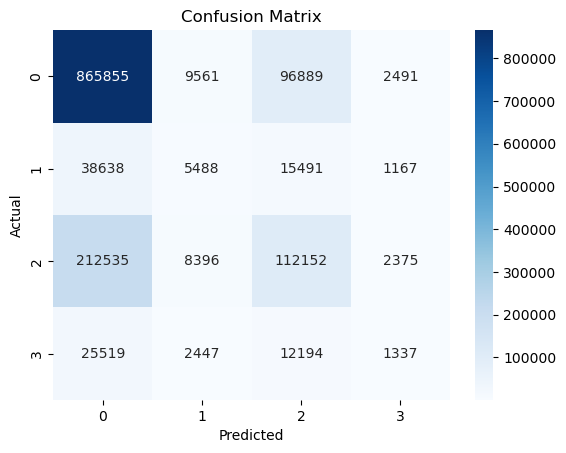

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
classes = np.unique(y_train)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


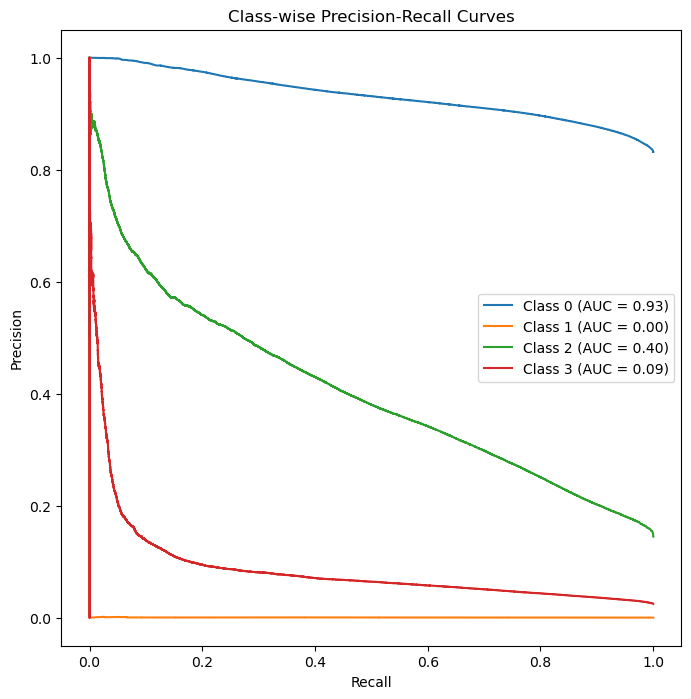

In [100]:
from sklearn.metrics import precision_recall_curve, auc

# Assuming y_test_one_hot is one-hot encoded
precision = dict()
recall = dict()
thresholds = dict()
auc_score = dict()

for i in range(num_classes):
    precision[i], recall[i], thresholds[i] = precision_recall_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    auc_score[i] = auc(recall[i], precision[i])

# Plot the precision-recall curves for each class
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(recall[i], precision[i], label=f'Class {i} (AUC = {auc_score[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Class-wise Precision-Recall Curves')
plt.legend()
plt.show()


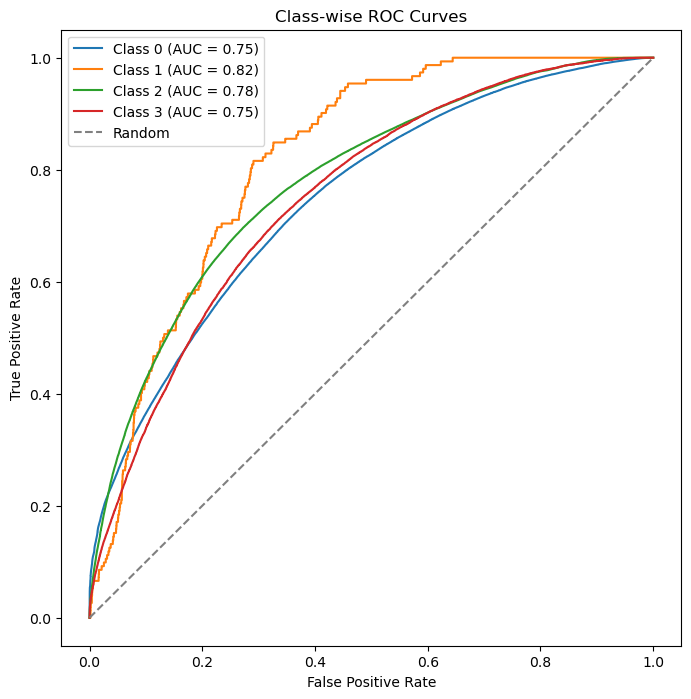

In [102]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test_one_hot is one-hot encoded
fpr = dict()
tpr = dict()
thresholds_roc = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], thresholds_roc[i] = roc_curve(y_test_one_hot[:, i], y_pred_one_hot[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure(figsize=(8, 8))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Class-wise ROC Curves')
plt.legend()
plt.show()
